### Solving Poisson Equation on S^2: $\Delta u = f$


iteration 0: loss = 46.484073638916016


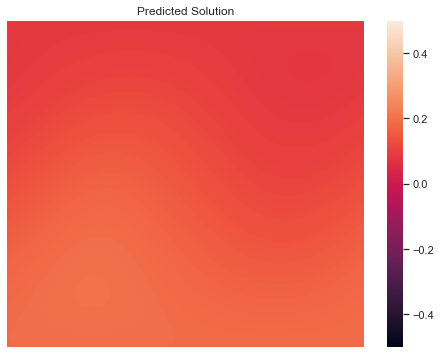

iteration 50: loss = 48.18635559082031
iteration 100: loss = 54.01812744140625
iteration 150: loss = 41.207637786865234
iteration 200: loss = 52.166175842285156
iteration 250: loss = 45.792137145996094
iteration 300: loss = 50.728302001953125
iteration 350: loss = 46.35253143310547
iteration 400: loss = 46.31501770019531
iteration 450: loss = 53.97467803955078
iteration 500: loss = 54.20346450805664


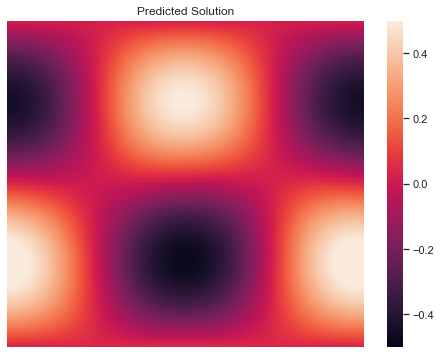

iteration 550: loss = 48.498470306396484
iteration 600: loss = 47.27813720703125
iteration 650: loss = 52.39352798461914
iteration 700: loss = 44.422855377197266
iteration 750: loss = 47.23735046386719
iteration 800: loss = 41.186920166015625
iteration 850: loss = 53.06905746459961
iteration 900: loss = 46.91086959838867
iteration 950: loss = 52.44059753417969
iteration 1000: loss = 48.74974822998047


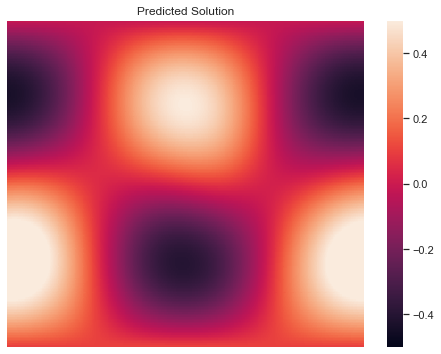

iteration 1050: loss = 41.70030975341797
iteration 1100: loss = 48.35410690307617
iteration 1150: loss = 46.762325286865234
iteration 1200: loss = 43.806251525878906
iteration 1250: loss = 51.52055358886719
iteration 1300: loss = 36.573116302490234
iteration 1350: loss = 50.50899887084961
iteration 1400: loss = 48.174163818359375
iteration 1450: loss = 41.761173248291016
iteration 1500: loss = 43.489593505859375


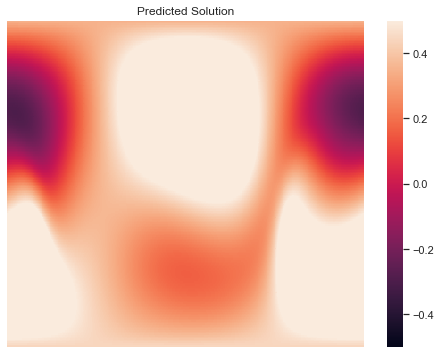

iteration 1550: loss = 43.58607482910156
iteration 1600: loss = 43.39710235595703
iteration 1650: loss = 31.09305191040039
iteration 1700: loss = 43.96520233154297
iteration 1750: loss = 39.19951248168945
iteration 1800: loss = 27.789710998535156
iteration 1850: loss = 26.94461441040039
iteration 1900: loss = 23.435394287109375
iteration 1950: loss = 25.440336227416992
iteration 2000: loss = 15.748184204101562


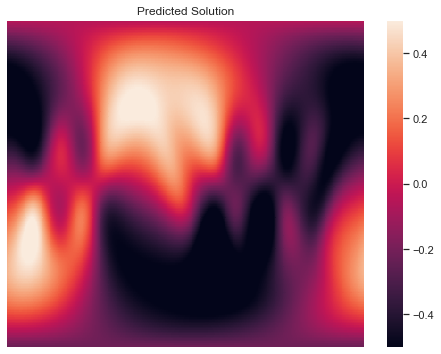

iteration 2050: loss = 11.813265800476074
iteration 2100: loss = 5.5924506187438965
iteration 2150: loss = 1.6179771423339844
iteration 2200: loss = 0.655512273311615
iteration 2250: loss = 0.3995198607444763
iteration 2300: loss = 0.336052268743515
iteration 2350: loss = 0.2453290820121765
iteration 2400: loss = 0.2554912567138672
iteration 2450: loss = 0.21602360904216766
iteration 2500: loss = 0.17620407044887543


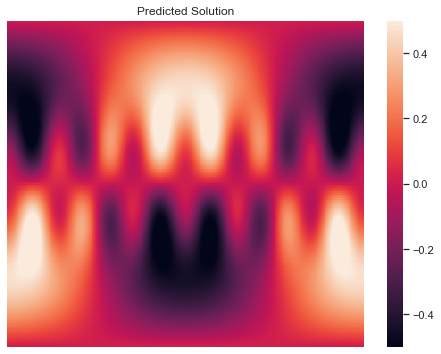

iteration 2550: loss = 0.13540120422840118
iteration 2600: loss = 0.12843380868434906
iteration 2650: loss = 0.10659931600093842
iteration 2700: loss = 0.106345035135746
iteration 2750: loss = 0.09274416416883469
iteration 2800: loss = 0.07137569785118103
iteration 2850: loss = 0.07386180758476257
iteration 2900: loss = 0.06408020853996277
iteration 2950: loss = 0.07278931140899658
iteration 3000: loss = 0.0570080392062664


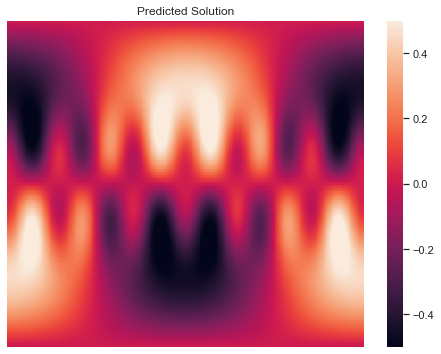

iteration 3050: loss = 0.05479922145605087
iteration 3100: loss = 0.05305815860629082
iteration 3150: loss = 0.04903987795114517
iteration 3200: loss = 0.05983593687415123
iteration 3250: loss = 0.04557427018880844
iteration 3300: loss = 0.03596313297748566
iteration 3350: loss = 0.04149786755442619
iteration 3400: loss = 0.03494332730770111
iteration 3450: loss = 0.03801315650343895
iteration 3500: loss = 0.04201095178723335


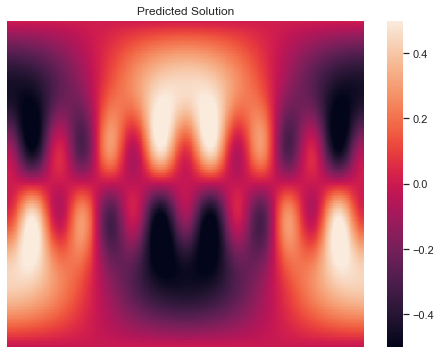

iteration 3550: loss = 0.030848462134599686
iteration 3600: loss = 0.0545274093747139
iteration 3650: loss = 0.03023058921098709
iteration 3700: loss = 0.03636059910058975
iteration 3750: loss = 0.035305991768836975
iteration 3800: loss = 0.02822590433061123
iteration 3850: loss = 0.021683426573872566
iteration 3900: loss = 0.0216598492115736
iteration 3950: loss = 0.030973438173532486
iteration 4000: loss = 0.02851184643805027


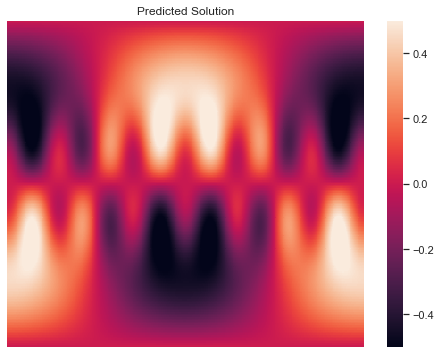

iteration 4050: loss = 0.026670748367905617
iteration 4100: loss = 0.023613858968019485
iteration 4150: loss = 0.026687830686569214
iteration 4200: loss = 0.0193083044141531
iteration 4250: loss = 0.024476179853081703
iteration 4300: loss = 0.02370784617960453
iteration 4350: loss = 0.027514351531863213
iteration 4400: loss = 0.028318461030721664
iteration 4450: loss = 0.022813035175204277
iteration 4500: loss = 0.015112938359379768


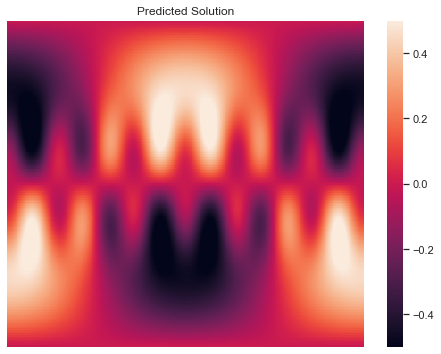

iteration 4550: loss = 0.02244052104651928
iteration 4600: loss = 0.02498595416545868
iteration 4650: loss = 0.028430094942450523
iteration 4700: loss = 0.025952259078621864
iteration 4750: loss = 0.022701743990182877
iteration 4800: loss = 0.019780701026320457
iteration 4850: loss = 0.01925565116107464
iteration 4900: loss = 0.019097380340099335
iteration 4950: loss = 0.019995683804154396


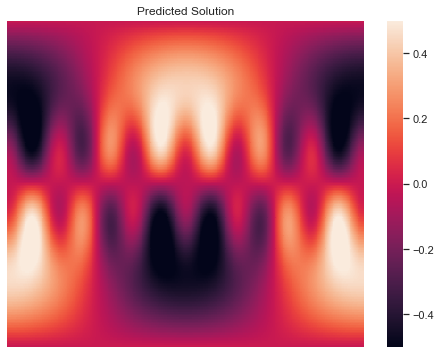

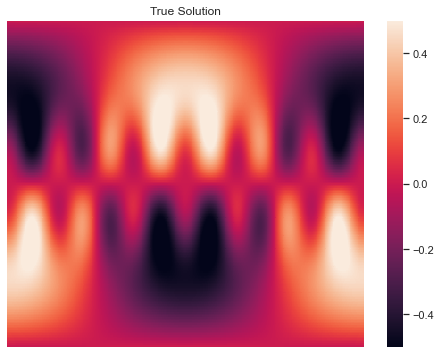

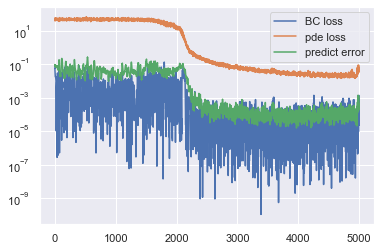

In [10]:
import torch

from Basis import SPHBasis
from Problem import Problem_Sphere_Poisson
from Model import Model
from Net import Sphere_Net, SPH_Sphere_Net
import seaborn as sns
import matplotlib.pyplot as plt
import math
from math import pi
from spherical_harmonics import *
from torch.distributions.uniform import Uniform

torch.manual_seed(0)
maxiter = 5000
problem = Problem_Sphere_Poisson()


def construct_model(net):
    class Poisson1dModel(Model):
        def add_loss_history(self):
            self.loss_history.append([self.bc_loss, self.pde_loss, self.predict_error_value])

        def __init__(self):
            super().__init__(problem=problem, net=net, maxiter=maxiter)

        def inner_sample(self, num=200):
            x = torch.randn(num, 3)
            x = x / (torch.norm(x, dim=1).reshape((-1, 1)))
        
            polar = torch.atan(x[:, :1] / x[:, 1:2]) + math.pi / 2
            polar[:num // 2, 0] = polar[:num // 2, 0] + math.pi
            azimuth = torch.acos(x[:, 2:3])
            
            ## noise
            dpolar = 2 * pi/(num-1) 
            polar_noise = polar + torch.distributions.Uniform(low = -dpolar/2, high = dpolar/2).sample(sample_shape=torch.Size(polar.shape))
            
            dazimuth = pi/(num-1) 
            azimuth_noise = azimuth + torch.distributions.Uniform(low = -dazimuth/2, high = dazimuth/2).sample(sample_shape=torch.Size(polar.shape))            
            
            x = torch.cat([azimuth_noise, polar_noise], dim=1)
            return x

        def bc_sample(self):
            return torch.tensor([[1., 1.]])

        def init_sample(self):
            pass

        def plot(self, net):
            azimuth = torch.linspace(0, math.pi, 200, requires_grad=False)
            polar = torch.linspace(0, 2 * math.pi, 400, requires_grad=False)
            azimuth, polar = torch.meshgrid(azimuth, polar)
            location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
            value = net(location)
            
            value = value.reshape((200, 400))
            
            fig, ax = plt.subplots(1, 1, figsize=(8, 6))
            sns.set()
            sns.heatmap(value.detach().numpy(), ax=ax, vmin=-0.5, vmax=0.5, cbar=True)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title("Predicted Solution")
            plt.show()
        
        def plot_true(self):
            azimuth = torch.linspace(0, math.pi, 200, requires_grad=False)
            polar = torch.linspace(0, 2 * math.pi, 400, requires_grad=False)
            azimuth, polar = torch.meshgrid(azimuth, polar)
            location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
            value = true_solution(location[:, 0:1], location[:, 1:])
            
            value = value.reshape((200, 400))
            
            fig, ax = plt.subplots(1, 1, figsize=(8, 6))
            sns.set()
            sns.heatmap(value.detach().numpy(), ax=ax, vmin=-0.5, vmax=0.5, cbar=True)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title("True Solution")
            plt.show()
            
        def post_process(self, ax=None):
            if ax is None:
                plt.plot(self.loss_history)
                plt.yscale('log')
                plt.legend(('BC loss', 'pde loss', 'predict error'))
                plt.show()
            else:
                ax.plot(self.loss_history)
                ax.set_yscale('log')
                ax.set_ylim(1e-4, 100)
                ax.legend(('BC loss', 'pde loss', 'predict error'))

        def predict_error(self):
            coor = self.inner_sample(num=1000)
            true = self.problem.ground_truth(coor)
            predict = self.net(coor)
            predict_error = self.pde_loss_f(true, predict)
            return predict_error

        def train(self, ax100=None):
            problem = self.problem
            net = self.net
            opt = self.opt
            maxiter = self.maxiter

            for iter in range(maxiter):
                net.zero_grad()

                coor_inner = self.inner_sample().detach().requires_grad_(True)
                infer_value_inner = net(coor_inner)
                truth_inner, predict_inner = problem.pde(coor_inner, infer_value_inner)
                self.pde_loss = self.pde_loss_f(predict_inner, truth_inner)

                bc_samples = self.bc_sample()
                if bc_samples is None:
                    self.bc_loss = torch.tensor(0.)
                else:
                    coor_bc = bc_samples.detach().requires_grad_(True)
                    infer_value_bc = net(coor_bc)
                    truth_bc, predict_bc = problem.bound_condition(coor_bc, infer_value_bc)
                    self.bc_loss = self.bc_loss_f(predict_bc, truth_bc)

                init_samples = self.init_sample()
                if init_samples is None:
                    self.init_loss = torch.tensor(0.)
                else:
                    coor_init = init_samples.detach().requires_grad_(True)
                    infer_value_init = net(coor_init)
                    truth_init, predict_init = problem.bound_condition(coor_init, infer_value_init)
                    self.init_loss = self.bc_loss_f(predict_init, truth_init)
                self.predict_error_value = self.predict_error()
                self.total_loss = self.pde_loss + self.bc_loss + self.init_loss
                self.add_loss_history()
                self.total_loss.backward()

                opt.step()
                opt.zero_grad()
                
                for i in range(len(self.loss_history)):
                    for j in range(3):
                        self.loss_history[i][j] = self.loss_history[i][j].detach().requires_grad_(False)
                        
                if iter % (maxiter // 100) == 0:
                    print("iteration {}: loss = {}".format(iter, self.total_loss))
                        
                if iter % int(maxiter / 10) == 0:
                    self.plot(net)
                
            self.plot(net)
            self.plot_true()
            self.post_process()

    return Poisson1dModel()

model = construct_model(Sphere_Net([3, 50, 50, 50, 16, 1]))
model.train()
